In [ ]:
import pandas as pd
import numpy as np

In [ ]:
  df = pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS LAB/Datasets/spotify_good.csv")

In [ ]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0,2024
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0,2023
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1,2024


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [ ]:
ls = ((df.isnull().sum() / 4600) * 100)

In [ ]:
ls

,0
Track,0.000000
Album Name,0.000000
Artist,0.108696
Release Date,0.000000
ISRC,0.000000
All Time Rank,0.000000
Track Score,0.000000
Spotify Streams,2.456522
Spotify Playlist Count,1.521739
Spotify Playlist Reach,1.565217


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
null_percentages = (df.isnull().mean() * 100).astype(int)

In [ ]:
null_percentages

,0
Track,0
Album Name,0
Artist,0
Release Date,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,2
Spotify Playlist Count,1
Spotify Playlist Reach,1


In [ ]:
def mean_median_imputation(df, col):
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
def knn_imputation(df, cols):
    imputer = KNNImputer(n_neighbors=5)
    df[cols] = imputer.fit_transform(df[cols])

In [ ]:
for col in df.columns:
    print(col)
    if null_percentages[col] > 0 and null_percentages[col] <= 10:
        mean_median_imputation(df, col)
    elif null_percentages[col] > 10:
        knn_imputation(df, [col])

Track
Album Name
Artist
Release Date
ISRC
All Time Rank
Track Score
Spotify Streams
Spotify Playlist Count
Spotify Playlist Reach
Spotify Popularity
YouTube Views
YouTube Likes
TikTok Posts
TikTok Likes
TikTok Views
YouTube Playlist Reach
Apple Music Playlist Count
AirPlay Spins
SiriusXM Spins
Deezer Playlist Count
Deezer Playlist Reach
Amazon Playlist Count
Pandora Streams
Pandora Track Stations
Shazam Counts
Explicit Track
Year


In [ ]:
df.isnull().sum()

,0
Track,0
Album Name,0
Artist,5
Release Date,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,0
Spotify Playlist Count,0
Spotify Playlist Reach,0


In [ ]:
df['Artist'].fillna(method = 'ffill', inplace = True)

<ipython-input-17-4c23931681e9>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Artist'].fillna(method = 'ffill', inplace = True)


In [ ]:
df.isnull().sum()

,0
Track,0
Album Name,0
Artist,0
Release Date,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,0
Spotify Playlist Count,0
Spotify Playlist Reach,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4600 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4600 non-null   float64
 8   Spotify Playlist Count      4600 non-null   float64
 9   Spotify Playlist Reach      4600 non-null   float64
 10  Spotify Popularity          4600 non-null   float64
 11  YouTube Views               4600 non-null   float64
 12  YouTube Likes               4600 non-null   float64
 13  TikTok Posts                4600 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_numerical(col):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')

    plt.show()
    print(df[col].describe())
    print("\n")

In [ ]:
cat_cols = df.select_dtypes(include=['object'])
for col in cat_cols:
    print(col)
    print(len(df[col].unique()))

Track
4370
Album Name
4005
Artist
1999
ISRC
4598


In [ ]:
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode(numeric_only=True).iloc[0]
std_dev_values = df.std(numeric_only=True)
variance_values = df.var(numeric_only=True)
skewness_values = df.skew(numeric_only=True)
kurtosis_values = df.kurtosis(numeric_only=True)


print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)
print("\nStandard Deviation:\n", std_dev_values)
print("\nVariance:\n", variance_values)
print("\nSkewness:\n", skewness_values)
print("\nKurtosis:\n", kurtosis_values)

Mean:
 All Time Rank                 2.290678e+03
Track Score                   4.184404e+01
Spotify Streams               4.473873e+08
Spotify Playlist Count        5.939083e+04
Spotify Playlist Reach        2.334682e+07
Spotify Popularity            6.350158e+01
YouTube Views                 4.027967e+08
YouTube Likes                 2.930049e+06
TikTok Posts                  9.443076e+05
TikTok Likes                  1.126375e+08
TikTok Views                  1.161158e+09
YouTube Playlist Reach        3.439601e+08
Apple Music Playlist Count    5.460312e+01
AirPlay Spins                 5.513916e+04
SiriusXM Spins                2.573444e+02
Deezer Playlist Count         3.231095e+01
Deezer Playlist Reach         1.294939e+06
Amazon Playlist Count         2.534894e+01
Pandora Streams               8.566735e+07
Pandora Track Stations        8.787697e+04
Shazam Counts                 2.529149e+06
Explicit Track                3.589130e-01
Year                          2.020617e+03
dtyp

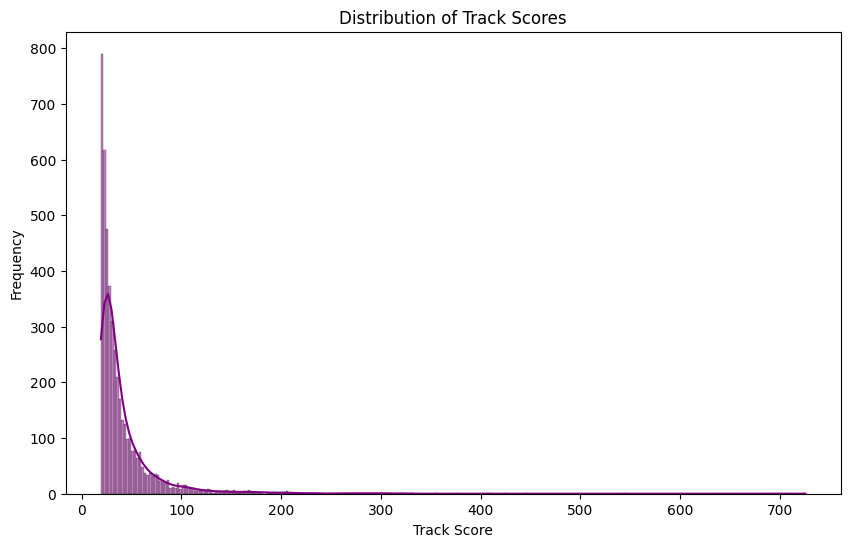

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Track Score'], kde=True, color='purple')
plt.title('Distribution of Track Scores')
plt.xlabel('Track Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.Artist.value_counts()

,count
Artist,
Drake,64
Taylor Swift,63
Bad Bunny,60
KAROL G,32
The Weeknd,31
...,...
Carrier,1
Javed Ali,1
The King Khan & BBQ Show,1
